In [13]:
import os
import pandas as pd
from feature_functions import apply_zscore_signal
from utils.backtester import Backtester

# Directory containing asset data
asset_dir = './hist_data/crypto/kraken_4hr/'

# Initialize EV dictionary
asset_ev_dict = {}
df_dict = {}
reg_window = 5
reg_thresh = .75
# Iterate over all assets
for asset_file in os.listdir(asset_dir):
    if asset_file.endswith('.txt'):
        asset_path = os.path.join(asset_dir, asset_file)
        df = pd.read_csv(asset_path, sep=',')
        df['Date'] = pd.to_datetime(df['date'], unit='s')
        df_dict[asset_file] = df

DOTUSDT.txt


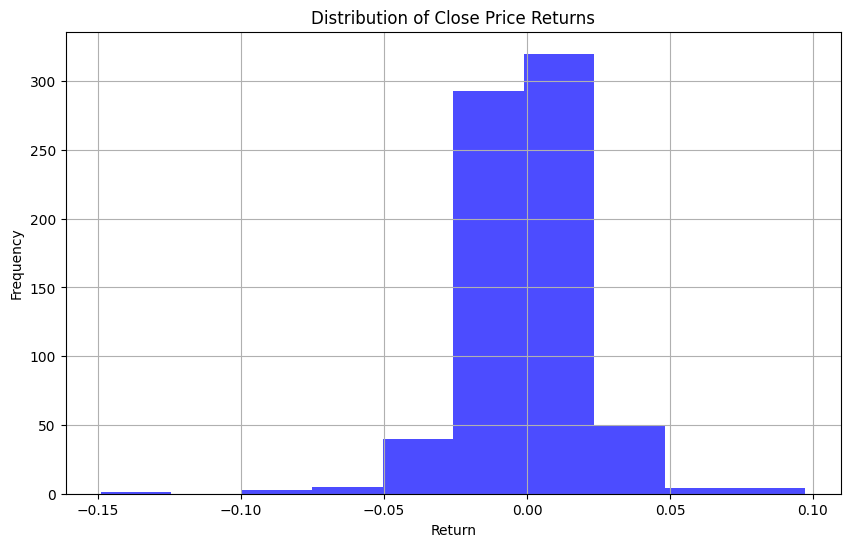

In [45]:
import matplotlib.pyplot as plt

syms = list(df_dict.keys())

df = df_dict[syms[7]]

print(syms[7])
returns = df['close'].pct_change().dropna()

plt.figure(figsize=(10, 6))
plt.hist(returns, bins=10, color='blue', alpha=0.7)
plt.title('Distribution of Close Price Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Green candles: 143    70.0
144    71.0
145    72.0
146    71.0
147    71.0
       ... 
715    74.0
716    73.0
717    74.0
718    74.0
719    74.0
Length: 577, dtype: float64
Red candles: 143    73.0
144    72.0
145    71.0
146    72.0
147    72.0
       ... 
715    70.0
716    71.0
717    70.0
718    70.0
719    70.0
Length: 577, dtype: float64


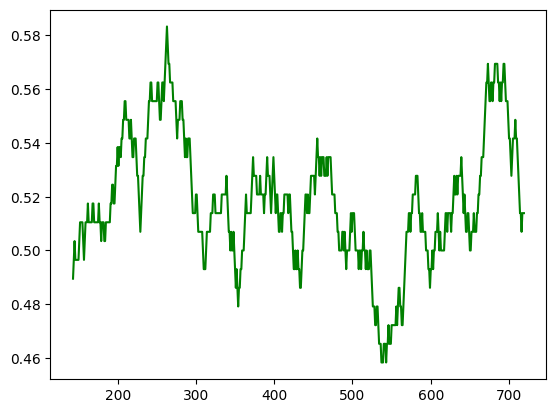

In [46]:
green_candles = (df['close'] > df['open']).rolling(144).sum().dropna()
red_candles = (df['close'] < df['open']).rolling(144).sum().dropna()

print(f"Green candles: {green_candles}")
print(f"Red candles: {red_candles}")
rolling_ratio = green_candles / (green_candles + red_candles)

plt.plot(rolling_ratio, label='Rolling Ratio of Green Candles', color='green')
plt.show()

{'Initial Balance': 10000, 'Final Balance': 12610.676248985854, 'Total Return (%)': 26.106762489858536, 'Max Drawdown (%)': -29.960738205715003, 'Sharpe Ratio': 0.5155300441635046}


c:\Users\nick5\dev\hypercube_ai\ai\treetrader\utils\backtester.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9990.000000000002' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'Portfolio'] = balance + (position * df.loc[i, 'close'])


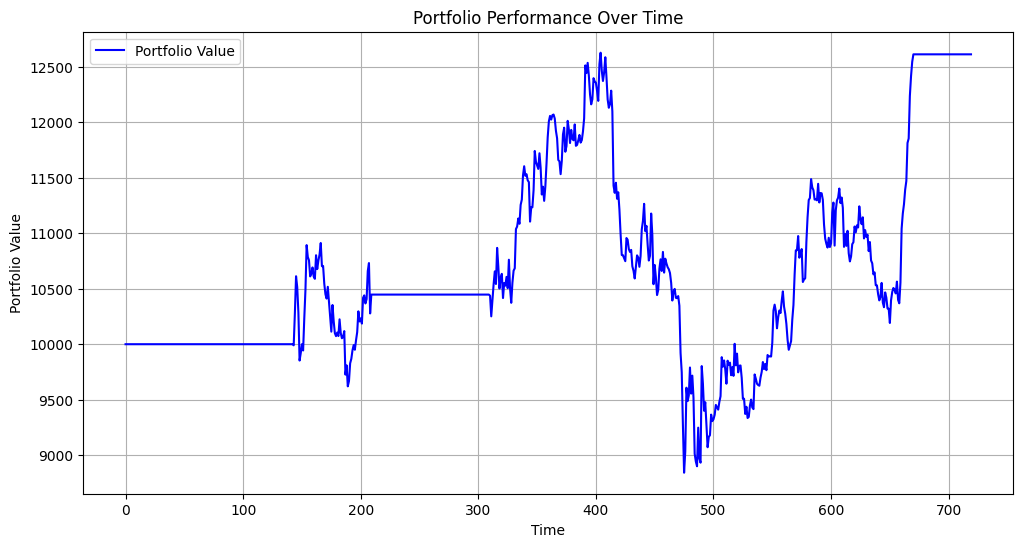

In [47]:
from utils.backtester import Backtester
df["rolling_ratio"] = rolling_ratio
# Initialize Backtester
backtester = Backtester(initial_balance=10000, transaction_cost=0.001)
# Simple momentum strategy
df['Signal'] = 0
df.loc[df['rolling_ratio'] < 0.5, 'Signal'] = 1   # Strong uptrend
df.loc[df['rolling_ratio'] > 0.55, 'Signal'] = -1  # Strong downtrend

result = backtester.simple_backtest(df, signal_column='Signal')
print(backtester.calculate_performance(result))
# Plot the performance of the backtest
backtester.plot_performance(result)